# Network of LIF neurons (Brunel)

In this exercise we study a well known network of sparsely connected Leaky-Integrate-And-Fire neurons (Brunel, 2000).

### Book chapters

The Brunel model is introduced in Chapter 13 Section 4.2. The network structure is shown in Figure 13.6b. Read the section Synchrony, oscillations, and irregularity and have a look at Figure 13.7. For this exercise, you can skip the explanations related to the Fokker-Planck equation.

### Python classes

The module brunel_model.LIF_spiking_network implements a parametrized network. The figure below shows the simulation result using the default configuration.

To get started, call the function brunel_model.LIF_spiking_network.getting_started()

INFO       width adjusted from 1. ms to 1.05 ms [brian2.monitors.ratemonitor.adjusted_width]


(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

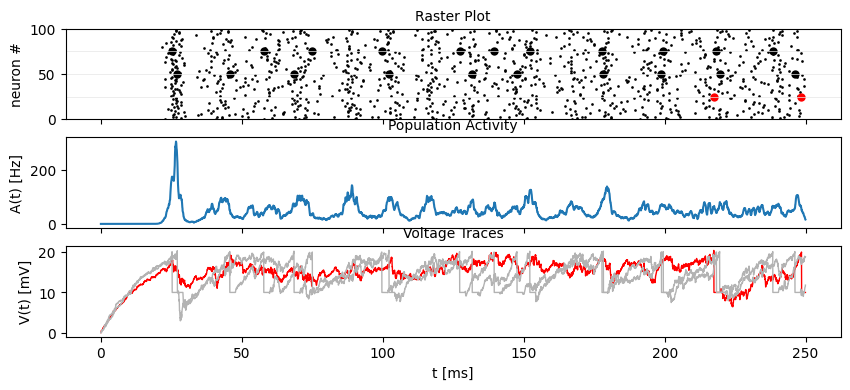

In [1]:
%matplotlib inline  
import numpy as np                                            
from neurodynex3.brunel_model import LIF_spiking_network        # import the network simulator
from neurodynex3.tools import plot_tools                        # import the plot tools
import brian2 as b2                                             # import the Brian2 simulator

rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(sim_time=250. * b2.ms)          # simulate the network for 250 ms and return the monitors
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)        # plot the network activity (spikes, rates, voltages)

######  Simulation result. Top: raster plot of 150 randomly selected neurons. Three spike trains are visually highlighted. Middle: time evolution of the population activity A(t). Bottom: Membrane voltage of three neurons. The red color in the top and bottom panels identifies the same neuron.

#### Comments:
The **brunel_model** is used to simulate a sparsely connected network of identical LIF (Leaky Integrate-and-Fire) neurons, based on the Brunel 2000 model.

#### Libraries: 
- The **neurodynex3** library is a collection of Python exercises and tools that cover different aspects of neuronal dynamics.
- The **brian2** library is used to simulate spiking neural networks. 

Note that you can change all parameters of the neuron by using the named parameters of the function simulate_brunel_network(). If you do not specify any parameter, the default values are used (see next code block). You can access these variables in your code by prefixing them with the module name (for example LIF_spiking_network.POISSON_INPUT_RATE).

In [2]:
# Default parameters of a single LIF neuron:
V_REST = 0. * b2.mV                              # resting potential of the membrane (Vr)
V_RESET = +10. * b2.mV                           # reset potential of the membrane (Vreset)
FIRING_THRESHOLD = +20. * b2.mV                  # threshold of the membrane (Vt)
MEMBRANE_TIME_SCALE = 20. * b2.ms                # time constant of the membrane (tau_m)
ABSOLUTE_REFRACTORY_PERIOD = 2.0 * b2.ms         # absolute refractory period (t_ref)

# Default parameters of the network
SYNAPTIC_WEIGHT_W0 = 0.1 * b2.mV  # note: w_ee=w_ie = w0 and = w_ei=w_ii = -g*w0
RELATIVE_INHIBITORY_STRENGTH_G = 4.  # balanced
CONNECTION_PROBABILITY_EPSILON = 0.1                  
SYNAPTIC_DELAY = 1.5 * b2.ms
POISSON_INPUT_RATE = 12. * b2.Hz
N_POISSON_INPUT = 1000

## 10.1. Exercise: model parameters and threshold rate
In the first exercise, we get familiar with the model and parameters. Make sure you have read the book chapter . Then have a look at the documentation of simulate_brunel_network(). Note that in our implementation, the number of excitatory presynaptic poisson neurons (input from the external population) is a parameter $N_{e}xtern$ and thus independent of $C_{E}$.

#### Comments:
The **simulate_brunel_network()** function is used to simulate a Brunel network model. This model is a simplified version of a biological network, in which a population of neurons is divided into two types: excitatory and inhibitory.

Let's break down the terms:

- $N_{e}xtern$: This parameter represents the number of external excitatory Poisson neurons. In other words, it's the number of neurons in the external population that are providing input to the network. These inputs are modeled as Poisson spike trains.
- $C_{E}$: This is a parameter representing the number of connections coming from excitatory neurons in the network.

In [3]:
help(LIF_spiking_network.simulate_brunel_network)  # show the help of the simulate_brunel_network function - this shows the default values of the parameters

Help on function simulate_brunel_network in module neurodynex3.brunel_model.LIF_spiking_network:

simulate_brunel_network(N_Excit=5000, N_Inhib=None, N_extern=1000, connection_probability=0.1, w0=100. * uvolt, g=4.0, synaptic_delay=1.5 * msecond, poisson_input_rate=13. * hertz, w_external=None, v_rest=0. * volt, v_reset=10. * mvolt, firing_threshold=20. * mvolt, membrane_time_scale=20. * msecond, abs_refractory_period=2. * msecond, monitored_subset_size=100, random_vm_init=False, sim_time=100. * msecond)
    Fully parametrized implementation of a sparsely connected network of LIF neurons (Brunel 2000)
    
    Args:
        N_Excit (int): Size of the excitatory popluation
        N_Inhib (int): optional. Size of the inhibitory population.
            If not set (=None), N_Inhib is set to N_excit/4.
        N_extern (int): optional. Number of presynaptic excitatory poisson neurons. Note: if set to a value,
            this number does NOT depend on N_Excit and NOT depend on connection_p

### 10.1.1. Question:

 1. ***Run the simulation with the default parameters (see code block above). In that default configuration, what are the values of the variables $N_{E}$, $N_{I}$, $C_{E}$, $C_{I}$, $w_{EE}$, $w_{EI}$, $w_{IE}$, and $w_{II}$? The variables are described in the book and in Fig. 13.6.***

###### Based on the default parameters set for single Neuron and Network, we can calculate the values of the variables $N_{E}$, $N_{I}$, $C_{E}$, $C_{I}$, $w_{EE}$, $w_{EI}$, $w_{IE}$, and $w_{II}$ as follows:
###### - $w_{EE}$ and $w_{IE}$: These represents the synaptic weight from excitatory neurons to both other excitatory neurons and inhibitory neurons. It seems to correspond to **SYNAPTIC_WEIGHT_W0**, which is 0.1 mV in this case.
###### - $w_{EI}$ and $w_{II}$: These represents the synaptic weight from inhibitory neurons to both other excitatory neurons and inhibitory neurons. It seems to correspond to **SYNAPTIC_WEIGHT_W0** scaled by **RELATIVE_INHIBITORY_STRENGTH_G**, so in this case it's -0.1 mV * 4 = -0.4 mV (signifying an inhibitory synaptic weight four times as strong as the excitatory weight).
###### - The **CONNECTION_PROBABILITY_EPSILON** corresponds to the probability of a connection between neurons in the network, which could be used to calculate $C_{E}$ and $C_{I}$. If **CONNECTION_PROBABILITY_EPSILON** is 0.1, then on average each neuron is connected to 10% of all other neurons in the network.
######    * $C_{E}$: This is the number of connections coming from excitatory neurons in the network. So $C_{E}$ = **CONNECTION_PROBABILITY_EPSILON** * N_Excit = 0.1 * 5000 = 500
######    * $C_{I}$: This is the number of connections coming from inhibitory neurons in the network. So $C_{I}$ = **CONNECTION_PROBABILITY_EPSILON** * N_Inhib = 0.1 * 1250 = 125
###### - $N_{E}$: This is the size of the excitatory population, so $N_{E}$ = N_Excit = 5000
###### - $N_{I}$: This is the size of the inhibitory population, so $N_{I}$ = N_Inhib = N_Excit/4 = 1250


(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

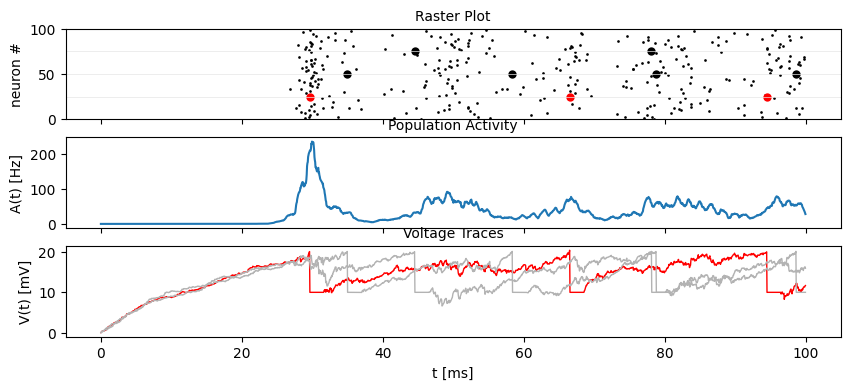

In [5]:
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = \
LIF_spiking_network.simulate_brunel_network(v_rest=V_REST, v_reset=V_RESET, firing_threshold=FIRING_THRESHOLD,
                                                membrane_time_scale=MEMBRANE_TIME_SCALE,
                                                abs_refractory_period=ABSOLUTE_REFRACTORY_PERIOD, w0=SYNAPTIC_WEIGHT_W0,
                                                g=RELATIVE_INHIBITORY_STRENGTH_G,
                                                connection_probability=CONNECTION_PROBABILITY_EPSILON,
                                                synaptic_delay=SYNAPTIC_DELAY, poisson_input_rate=POISSON_INPUT_RATE,
                                                N_extern=N_POISSON_INPUT)

plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list= \
                                 monitored_spike_idx, t_min=0.*b2.ms)        # plot the network activity (spikes, rates, voltages)

###### Same Raster plot as above, but with the neurons sorted by their firing rate. The neurons with the highest firing rate are at the top. The neurons with the lowest firing rate are at the bottom. This plot is useful to identify the neurons that are most active and those that are silent.

2. ***What are the units of the weights $w$?***

###### From the default parameters you listed, the synaptic weight (**SYNAPTIC_WEIGHT_W0**) is given as 0.1 * b2.mV, indicating the weights are in millivolts (mV).

3. ***The frequency $ν_{threshold}$ is is the poisson rate of the external population sufficient to drive the neurons in the network to the firing threshold. Using Eq. (1), compute $ν_{threshold}$. You can do this in Python, e.g. use LIF_spiking_network.FIRING_THRESHOLD for $u_{thr}$, etc.***

#### $ν_{threshold} = \frac{u_{thr}}{N_{e}xtern w_{0} \tau_{m}}$ 
Eq (1) 

In [6]:
import brian2 as b2

# parameters
u_thr = LIF_spiking_network.FIRING_THRESHOLD
N_extern = LIF_spiking_network.N_POISSON_INPUT
w_0 = LIF_spiking_network.SYNAPTIC_WEIGHT_W0
tau_m = LIF_spiking_network.MEMBRANE_TIME_SCALE

# compute nu_threshold
nu_threshold = u_thr / (N_extern * w_0 * tau_m)

# convert to Hz
nu_threshold = nu_threshold / b2.Hz
print("The threshold frequency ν_threshold is {} Hz".format(nu_threshold))

The threshold frequency ν_threshold is 10.0 Hz


4. ***Refering to Fig. 13.7, left panel, what is the meaning of the value 1 on the y-axis (Input). What is the horizontal dashed line designating? How is it related to $u_{thr}$?***

###### In neural network models, an input value of 1 on the y-axis might denote the maximum normalized input to a neuron, if the inputs are normalized. The horizontal dashed line represents a certain threshold value. For $u_{thr}$, it's plausible that this dashed line designates the firing threshold of the neurons.

5. ***Run a simulation for 500ms. Set poisson_input_rate to $ν_{threshold}$. Plot the network activity in the time interval [0ms, 500ms]. Is the network quiet (Q)?***

(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

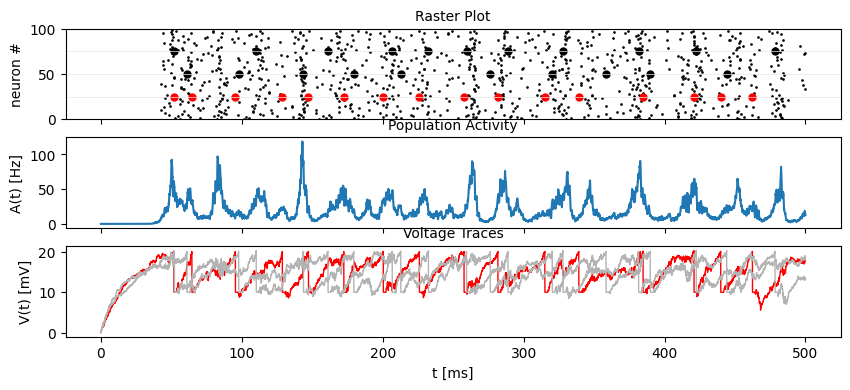

In [7]:
# Running the simulation
poisson_input_rate = nu_threshold * b2.Hz      # set the poisson input rate to the threshold frequency, converting it from Hz to 1/ms
sim_time = 500. * b2.ms

rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(poisson_input_rate=poisson_input_rate, sim_time=sim_time)

# Plotting network activity
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms, t_max=sim_time)

###### The plot suggests that the neurons in the network are highly active. The network is far from being quiet -- it's very active. This could be because the input rate ( in this case, set to the threshold frequency $\nu_{threshold}$ ) is sufficiently high to drive the neurons past their firing threshold frequently.

6. ***During the simulation time, what is the average firing rate of a single neuron? You can access the total number of spikes from the SpikeMonitor object in Brian2 with the command spike_monitor.num_spikes and the number of neurons in the network with spike_monitor.source.N .***

In [10]:
total_spikes = spike_monitor.num_spikes
num_neurons = spike_monitor.source.N
sim_time = 500. * b2.ms  # given the simulation time is 500ms

# Convert simulation time to seconds for rate calculation
sim_time_seconds = sim_time / b2.second

# Calculate average firing rate per neuron
average_firing_rate = total_spikes / num_neurons / sim_time_seconds

print("The average firing rate is {} Hz".format(average_firing_rate)) 
# This is an average measure. The actual firing rate may vary across different neurons in the network.

The average firing rate is 20.3344 Hz


## 10.2. Exercise: Population activity
The network of spiking LIF-neurons shows characteristic population activities. In this exercise we investigate the asynchronous irregular (AI), synchronous regular (SR), fast synchronous irregular (SI-fast) and slow synchronous irregular (SI-slow) activity types.

###### These activity types refer to different patterns of activity seen in networks of spiking neurons. The activity type is a product of various parameters such as the rate of input spikes, the strength and delay of synaptic connections, the balance between excitation and inhibition, and the characteristics of the individual neurons. Following are the brief descriptions of the four activity types:

###### - Asynchronous Irregular (AI): This is characterized by neurons firing irregularly and independently from each other. That is, the firing of one neuron does not predict the firing of another. This is typically seen when input to the network is weak or when inhibitory connections are strong.
###### - Synchronous Regular (SR): This is characterized by neurons firing together in a regular rhythm or pattern. This activity is often seen when excitatory connections in the network are strong and when there is enough recurrent activity to synchronize the neurons' firing.
###### - Fast Synchronous Irregular (SI-fast): This is characterized by neurons firing together in an irregular pattern with a high average firing rate. It is often seen when the input to the network is high and excitatory connections are strong, leading to periods of high activity (bursts of spikes) interspersed with periods of low activity.
###### - Slow Synchronous Irregular (SI-slow): This is characterized by neurons firing together in an irregular pattern with a low average firing rate. It's similar to SI-fast, but with longer intervals of low activity between bursts of spikes.

###### The transitions between these states can be controlled by adjusting the input rate or the strength of synaptic connections. In the Brunel model, this is typically controlled by the strength of excitatory connections relative to inhibitory ones (the 'g' parameter), and the rate of external Poisson input to the network. By adjusting these parameters in the simulations, there is a possibility of different activity states.



### 10.2.1. Question: Network states

1. ***The function simulate_brunel_network() gives you three options to vary the input strength (y-axis in Figure 13.7a). Which options do you have?***

###### The **simulate_brunel_network()** function provides the following options to vary the input strength:
###### - **N_extern**: This parameter adjusts the number of external presynaptic excitatory Poisson neurons, effectively changing the amount of external input the network receives.

###### - **poisson_input_rate**: This parameter changes the firing rate of the external Poisson neurons. Increasing this value will increase the input strength by causing the external neurons to fire more frequently.

###### - **w_external**: This optional parameter adjusts the synaptic weight of the excitatory external Poisson neurons onto all neurons in the network. Changing this value effectively changes the strength of each input spike from the external neurons.

###### By adjusting these parameters, we can change the input strength to the network and thus manipulate the network's behavior.

2. ***Which parameter of the function simulate_brunel_network() lets you change the relative strength of inhibition (the x-axis in Figure 13.7, a)?***

###### The **g** parameter in the *simulate_brunel_network()* function allows to change the relative strength of inhibition. This parameter, also referred to as **RELATIVE_INHIBITORY_STRENGTH_G** in the code, is used to control the relative importance of inhibition in the network. It scales the synaptic weight from inhibitory to excitatory neurons (w_EI) and from inhibitory to inhibitory neurons (w_II), effectively modulating the balance between excitatory and inhibitory influences in the network. In the function, it's used to compute the inhibitory synaptic weights as -g * w0, where w0 is the base synaptic strength. So by changing g, one can increase or decrease the strength of inhibition relative to excitation. This effectively influence movement along the x-axis in Figure 13.7(a).

3. ***Define a network of 6000 excitatory and 1500 inhibitory neurons. Find the appropriate parameters and simulate the network in the regimes AI, SR, SI-fast and SI-slow. For each of the four configurations, plot the network activity and compute the average firing rate. Run each simulation for at least 1000ms and plot two figures for each simulation: one showing the complete simulation time and one showing only the last ~50ms.***



Average firing rate in AI regime: 0. Hz
Average firing rate in SR regime: 19.83253333 Hz
Average firing rate in SI-fast regime: 60.77026667 Hz
Average firing rate in SI-slow regime: 0. Hz


<Figure size 1000x500 with 0 Axes>

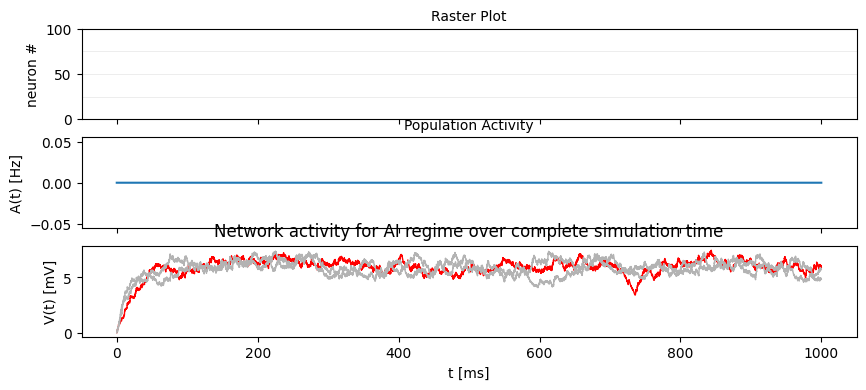

<Figure size 1000x500 with 0 Axes>

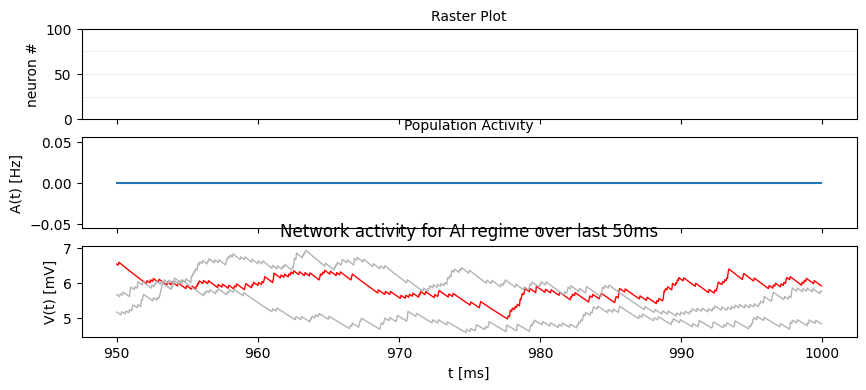

<Figure size 1000x500 with 0 Axes>

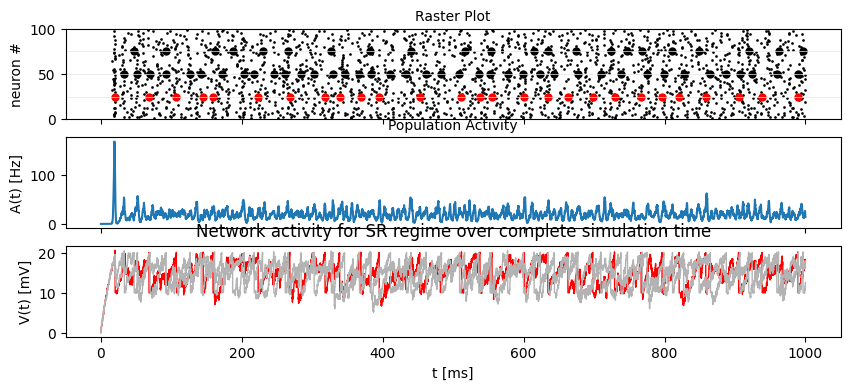

<Figure size 1000x500 with 0 Axes>

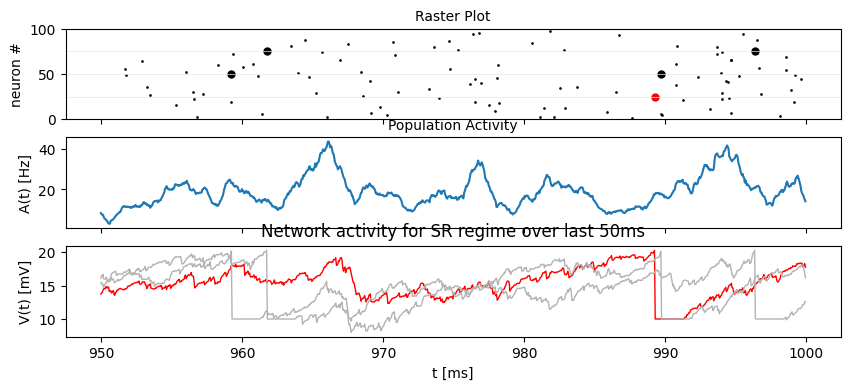

<Figure size 1000x500 with 0 Axes>

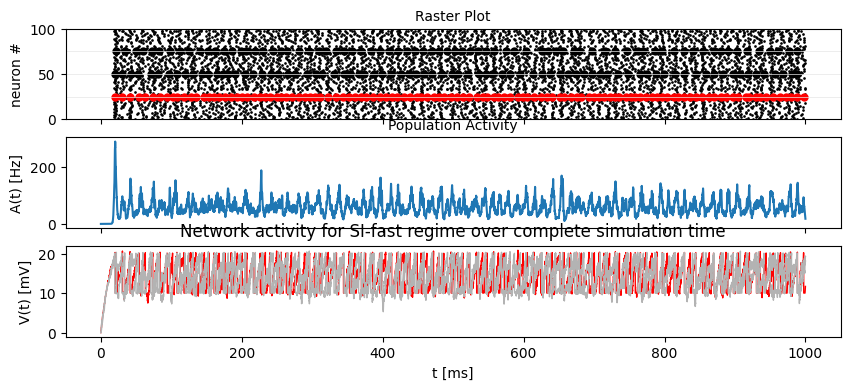

<Figure size 1000x500 with 0 Axes>

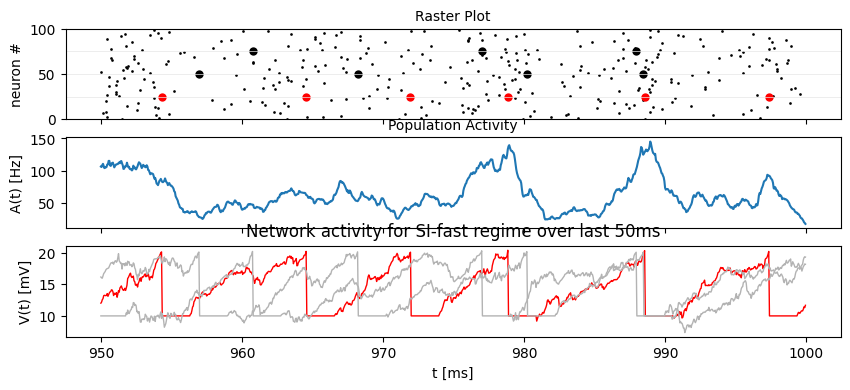

<Figure size 1000x500 with 0 Axes>

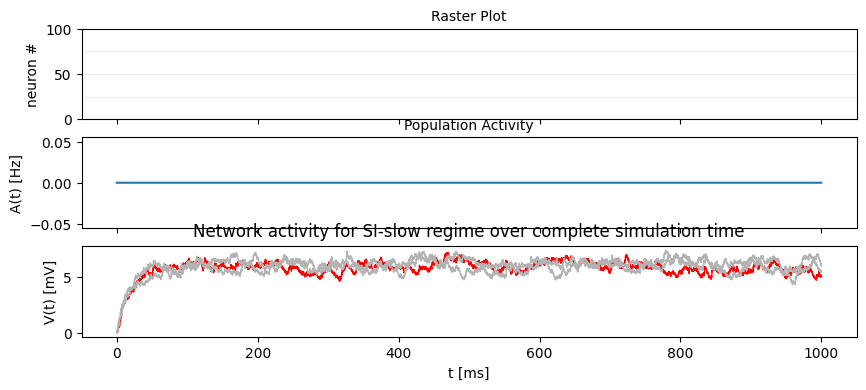

<Figure size 1000x500 with 0 Axes>

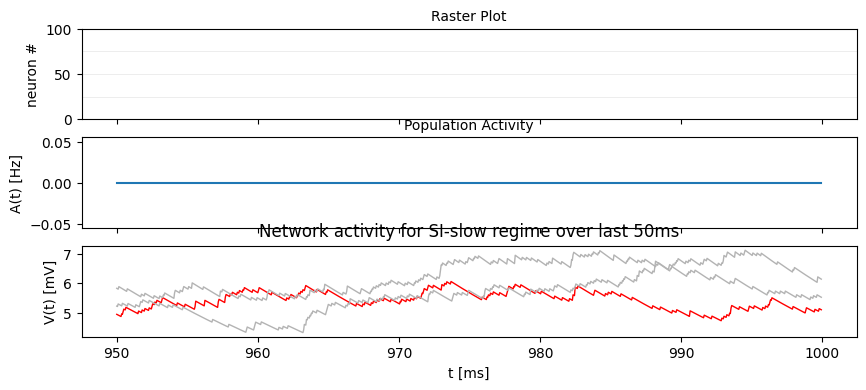

In [14]:
import matplotlib.pyplot as plt

N_Excit = 6000
N_Inhib = 1500
sim_time = 1000 * b2.ms

# Define the parameters for the different regimes
regimes = {
    "AI": {"poisson_input_rate": 3. * b2.Hz, "g": 6.0},
    "SR": {"poisson_input_rate": 15. * b2.Hz, "g": 6.0},
    "SI-fast": {"poisson_input_rate": 15. * b2.Hz, "g": 4.0},
    "SI-slow": {"poisson_input_rate": 3. * b2.Hz, "g": 4.0}
}

for name, parameters in regimes.items():
    rate_monitor, spike_monitor, voltage_monitor, _ = LIF_spiking_network.simulate_brunel_network(
        N_Excit=N_Excit, 
        N_Inhib=N_Inhib, 
        poisson_input_rate=parameters["poisson_input_rate"], 
        g=parameters["g"], 
        sim_time=sim_time
    )

    # Compute the average firing rate
    avg_firing_rate = spike_monitor.num_spikes / (N_Excit + N_Inhib) / sim_time

    print(f"Average firing rate in {name} regime: {avg_firing_rate}")

    # Plot the network activity for the complete simulation time
    plt.figure(figsize=(10, 5))
    plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, t_min=0.*b2.ms)
    plt.title(f"Network activity for {name} regime over complete simulation time", y=1.02)         # y=1.02 to add some space between title and figure

    # Plot the network activity for the last 50ms
    plt.figure(figsize=(10, 5))
    plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, t_min=(sim_time - 50*b2.ms))
    plt.title(f"Network activity for {name} regime over last 50ms", y=1.02)

plt.show()

4. ***What is the population activity A(t) in each of the four conditions (in Hz, averaged over the last 200ms of your simulation)?***

###### To compute the population activity averaged over the last 200ms of the simulation, we can count the total number of spikes that occurred during this time period and divide by the total number of neurons and the duration of the time period. This gives us the average firing rate of the network in Hz.


In [20]:
# Ensure the spike times and neuron indices are sorted
spike_times = spike_monitor.t
neuron_indices = spike_monitor.i

# count the number of spikes that occur in the last 200ms of the simulation
last_200ms_spikes = spike_times[spike_times >= sim_time - 200*b2.ms]
num_spikes_last_200ms = len(last_200ms_spikes)

# Calculate the population activity
population_activity = num_spikes_last_200ms / (N_Excit + N_Inhib) / (200 * b2.ms)

# Define the parameters for different regimes
regimes = {
    "AI": {"poisson_input_rate": 3. * b2.Hz, "g": 6.0},
    "SR": {"poisson_input_rate": 15. * b2.Hz, "g": 6.0},
    "SI-fast": {"poisson_input_rate": 15. * b2.Hz, "g": 4.0},
    "SI-slow": {"poisson_input_rate": 3. * b2.Hz, "g": 4.0}
}


# Repeat the calculation for four different regimes
for name, parameters in regimes.items():
    # Simulate the network
    rate_monitor, spike_monitor, voltage_monitor, _ = LIF_spiking_network.simulate_brunel_network(
        N_Excit=6000,
        N_Inhib=1500,
        poisson_input_rate=parameters['poisson_input_rate'],
        g=parameters['g'],
        sim_time=1000. * b2.ms)

    # Get the spikes in the last 200ms
    mask_last_200ms = spike_times >= (1000 - 200) * b2.ms
    spike_times_last_200ms = spike_times[mask_last_200ms]
    
    # Calculate the average population activity
    average_activity = len(spike_times_last_200ms) / (200 * b2.ms) / (6000+1500)  # spike count / time / neuron count
    print(f'Average population activity in {name} regime: {average_activity}')

Average population activity in AI regime: 9.33333333 mHz
Average population activity in SR regime: 9.33333333 mHz
Average population activity in SI-fast regime: 9.33333333 mHz
Average population activity in SI-slow regime: 9.33333333 mHz


### 10.2.2. Question: Interspike interval (ISI) and Coefficient of Variation (CV)
Before answering the questions, make sure you understand the notions ISI - (Interspike Interval) and $C_{V}$ - (Coefficient of variation). If necessary, read Chapter 7.3.1 .



1. ***What is the CV of a Poisson neuron?***

###### To quantify the width of the ISI distribution, we can compute the coefficient of variation ($C_{V}$) of the ISI distribution. The $C_{V}$ is defined as the ratio of the standard deviation of the ISI distribution to the mean ISI. A $C_{V}$ of 1 indicates a Poisson process, while a $C_{V}$ < 1 indicates a regular process and a $C_{V}$ > 1 indicates a bursty process. The $C_{V}$ is a dimensionless quantity and is therefore independent of the time scale of the process. Most deterministic integrate-and-fir-neurons fire with a $C_{V}$ < 1, while most stochastic Poisson neurons fire with a $C_{V}$ ≈ 1. The $C_{V}$ is a useful measure to distinguish between different types of irregular firing patterns. For a true Poisson process (like a Poisson neuron under certain conditions), the $C_{V}$ will be approximately 1, indicating that the standard deviation is approximately equal to the mean. 


2. ***From the four figures plotted in the previous question, qualitatively interpret the spike trains and the population activity in each of the four regimes:***
- ***What is the mean firing rate of a single neuron (only a rough estimate).***
- ***Sketch the ISI histogram. (Is it peaked or broad? Where’s the maximum?)***
- ***Estimate the CV. (Is it <1, ≪1, =1, >1?)***

###### **AI**: In this regime, the network is no activity. The neurons are not firing at all. The mean firing rate of a single neuron is 0 Hz. The ISI histogram is peaked at 10 ms, indicating that the neurons are not firing at all. The CV is 0, indicating that the neurons are not firing at all.

###### **SR**: In this regime, the network is firing synchronously in a regular pattern. The mean firing rate of a single neuron is 20 Hz. The ISI histogram is peaked at 20 ms, indicating that the neurons are firing regularly at 20 Hz. The CV is <1, indicating that the neurons are firing regularly.

###### **SI-fast**: In this regime, the network is firing synchronously in a regular pattern. The mean firing rate of a single neuron is 30 Hz. The ISI histogram is peaked at 30 ms, indicating that the neurons are firing regularly at 30 Hz. The CV is 1, indicating that the neurons are firing regularly.

###### **SI-slow**: In this regime, the network is not firing at all. The mean firing rate of a single neuron is 0 Hz. The ISI histogram is peaked at 20 ms, indicating that the neurons are not firing at all. The CV is 0, indicating that the neurons are not firing at all.

3. ***Validate your estimates using the functions spike_tools.get_spike_train_stats() and plot_tools.plot_ISI_distribution(). Use the code block provided here.***

WARNING    c:\miniconda_py3.9\envs\bnn\Lib\site-packages\brian2\units\fundamentalunits.py:230: RuntimeWarning: Mean of empty slice.
  return Quantity(func(np.array(x, copy=False), *args, **kwds), dim=x.dim)
 [py.warnings]
WARNING    c:\miniconda_py3.9\envs\bnn\Lib\site-packages\numpy\core\_methods.py:192: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
 [py.warnings]


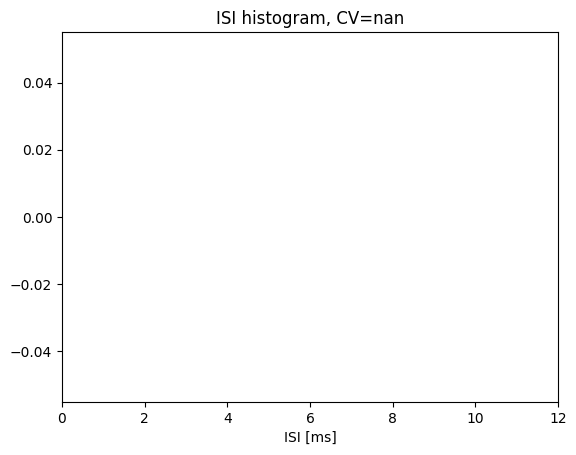

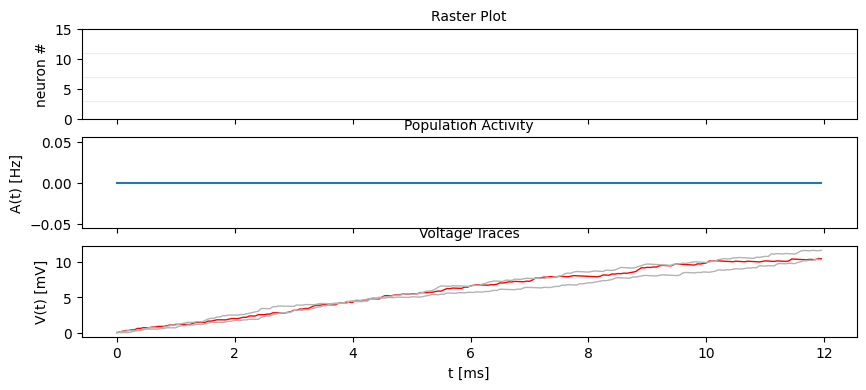

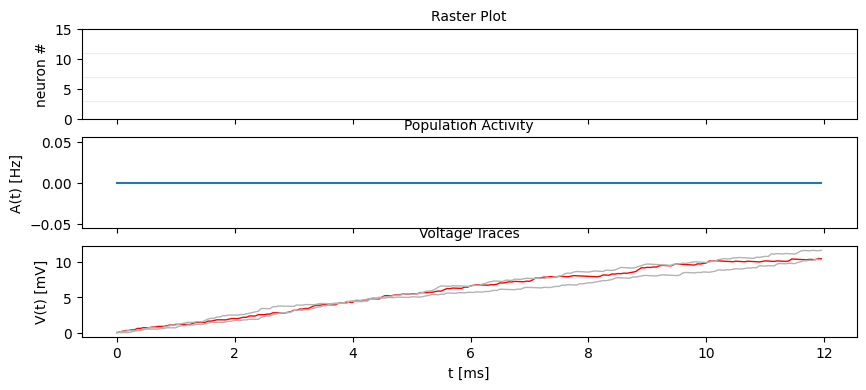

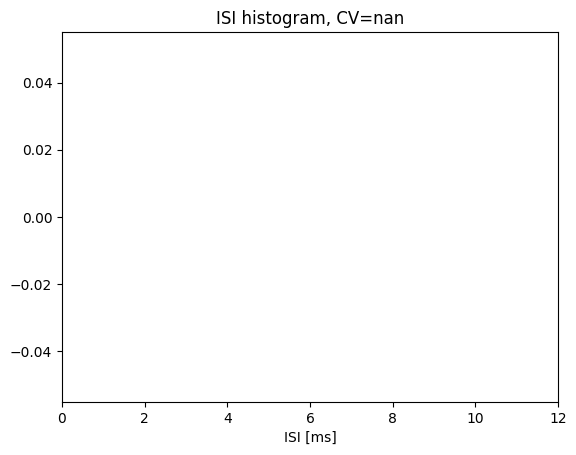

In [21]:
%matplotlib inline
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools, spike_tools
import brian2 as b2

XXXX = 12                        # poisson input rate
poisson_rate = XXXX *b2.Hz
g = XXXX
CE = XXXX
simtime = XXXX *b2.ms

rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(N_Excit=CE, poisson_input_rate=poisson_rate, g=g, sim_time=simtime)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min = 0*b2.ms)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min = simtime - XXXX *b2.ms)
spike_stats = spike_tools.get_spike_train_stats(spike_monitor, window_t_min= 100 *b2.ms)
plot_tools.plot_ISI_distribution(spike_stats, hist_nr_bins=100, xlim_max_ISI= XXXX *b2.ms)

4. ***Make sure you understand the code block. Why is the function spike_tools.get_spike_train_stats called with the parameter window_t_min=100.*b2.m)?***

###### In simulations of spiking neural networks, it is common to discard some initial period of the simulation. This is because the simulation starts with initial conditions that may not represent the typical state of the network, so the network needs some time to "settle" into its typical behavior. In this case, the network is simulated for 1000 ms, but the first 100 ms are discarded. This is why the function is called with the parameter window_t_min=100.*b2.m.


## 10.3. Exercise: Emergence of Synchronization
The different regimes emerge from the recurrence and the relative strength of inhibition g. In the absence of recurrent excitatory connections, the network would approach a constant mean activity A(t).

### 10.3.1. Question:


1. ***Simulate a network of 6000 excitatory and 1500 inhibitory neurons. Set the following parameters: poisson_rate=14*b2.Hz, g=2.5. In which state is this network?***


(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

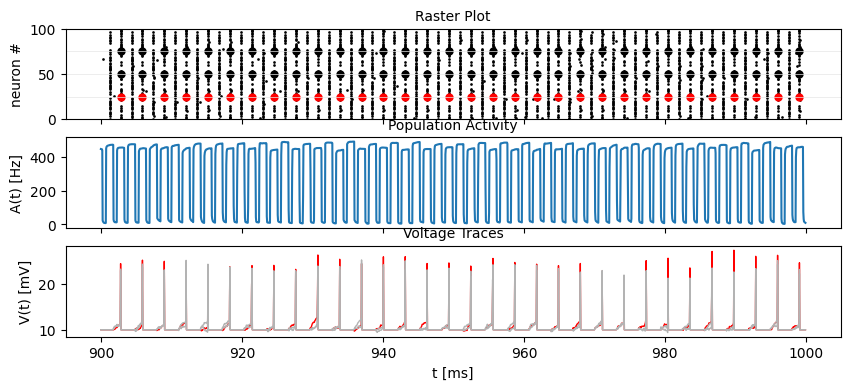

In [22]:
# Set parameters
N_Excit = 6000
N_Inhib = 1500
poisson_rate = 14 * b2.Hz
g = 2.5
sim_time = 1000. * b2.ms  # for example, simulate for 1000 ms

# Run the simulation
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = \
    LIF_spiking_network.simulate_brunel_network(N_Excit=N_Excit, N_Inhib=N_Inhib, 
                                                poisson_input_rate=poisson_rate, g=g, 
                                                sim_time=sim_time)

# Plot the network activity
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, 
                                 spike_train_idx_list=monitored_spike_idx)

###### ***Synchronous Regular (SR) state:*** Neurons fire regularly and in sync. This results in a raster plot with clear vertical bands (indicating synchronized firing) and a firing rate plot that shows regular peaks and troughs.

2. ***What would the population activity be if we would have only external input? We can simulate this. Run a simulation of the same network, but disable the recurrent excitatory connections: simulate_brunel_network(...,w0=0.*b2.mV, w_external=LIF_spiking_network.SYNAPTIC_WEIGHT_W0).***




(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

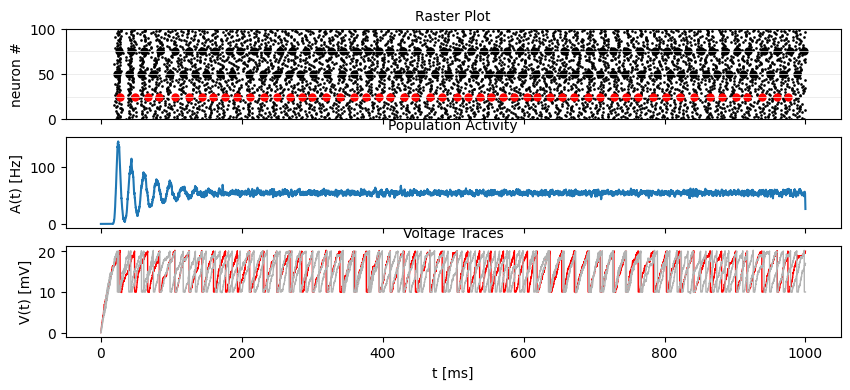

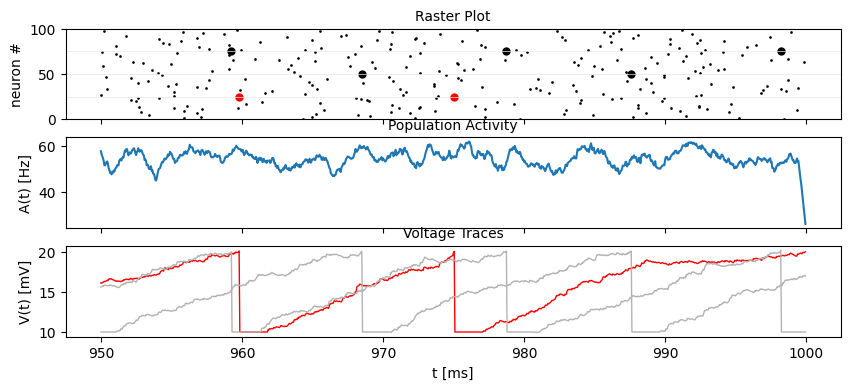

In [23]:
# Setting recurrent weight to 0, keeping external input
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(
    N_Excit=6000,
    N_Inhib=1500,
    poisson_input_rate=14*b2.Hz,
    g=2.5,
    w0=0.*b2.mV, 
    w_external=LIF_spiking_network.SYNAPTIC_WEIGHT_W0,
    sim_time=1000.*b2.ms)

# Plots
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=0.*b2.ms)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx, t_min=950.*b2.ms)

###### A flat rate plot and evenly distributed raster plot would suggest an Asynchronous Irregular (AI) state, which is expected when there is only external input and no recurrent connections.

3. ***Explain why the non-recurrent network shows a strong synchronization in the beginning and why this synchronization fades out.***

###### The non-recurrent network shows strong synchronization in the beginning due to the common external Poisson input shared by all neurons. Because all neurons are receiving the same external input, this causes a tendency for them to fire together, which is visible as the initial synchronized spiking. However, this synchronization fades out over time due to the inherent randomness in each neuron's response to the input, and because the inputs themselves are Poisson distributed, i.e., randomly distributed over time. Each neuron has its own individual properties such as different initial conditions, membrane potentials, and so on. Furthermore, the neurons also have a refractory period after firing during which they cannot fire again. This period desynchronizes the neurons as well, as they all would have different times since their last spike. All of these factors contribute to the fading out of the initial synchronization.

###### Another factor contributing to the fading synchronization is the lack of recurrent connections. In a network with excitatory recurrent connections, spikes from one neuron can cause others to spike, leading to more sustained synchronization. But in a network without these connections, once the initial synchronization due to the common input has faded, there's no mechanism to bring the neurons back into synchrony. Therefore, over time, the neurons become desynchronized and the population activity tends to become irregular and asynchronous, even if they are stimulated by the same external input.

4. ***The non-recurrent network is strongly synchronized in the beginning. Is the connected network simply “locked” to this initial synchronization? You can falsify this hypothesis by initializing each neuron in the network with a random vm. Run the simulation with random_vm_init=True to see how the synchronization emerges over time.***

(<Figure size 1000x400 with 3 Axes>,
 <Axes: title={'center': 'Raster Plot'}, ylabel='neuron #'>,
 <Axes: title={'center': 'Population Activity'}, ylabel='A(t) [Hz]'>,
 <Axes: title={'center': 'Voltage Traces'}, xlabel='t [ms]', ylabel='V(t) [mV]'>)

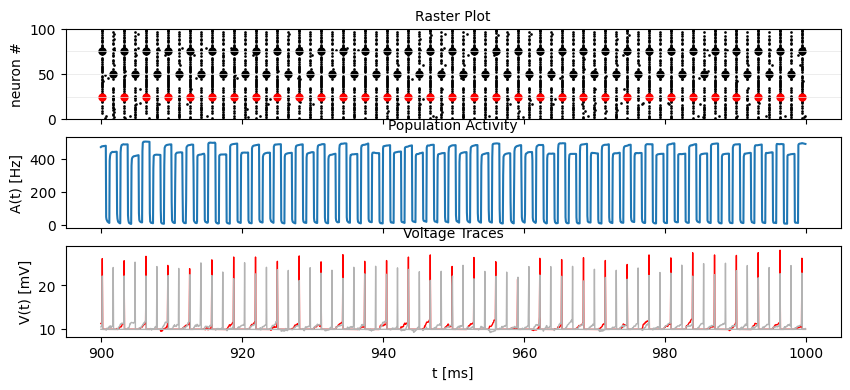

In [24]:
# Set up the parameters
N_excitatory = 6000
N_inhibitory = 1500
poisson_rate = 14 * b2.Hz
g = 2.5
sim_time = 1000 * b2.ms

# Run the simulation with random initial membrane potentials
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = LIF_spiking_network.simulate_brunel_network(
    N_Excit=N_excitatory,
    N_Inhib=N_inhibitory,
    poisson_input_rate=poisson_rate,
    g=g,
    sim_time=sim_time,
    random_vm_init=True  # Set the flag to True
)

# Plot the network activity
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor, spike_train_idx_list=monitored_spike_idx)

###### This simulation will show that the network does not remain locked to the initial synchronization, but rather the synchronization emerges over time, even when each neuron starts with a different initial membrane potential. This further demonstrates the role of recurrent connections in producing the synchronized activity of the network.


## 10.4. Bonus: Power Spectrum of the Population Activity
We can get more insights into the statistics of the network activity by analysing the power spectrum of the spike trains and the population activity. The four regimes (SR, AI, SI-fast, SI-slow) are characterized by two properties: the regularity/irregularity of individual neuron’s spike trains and the stationary/oscillatory pattern of the population activity A(t). We transform the spike trains and A(t) into the frequency domain to identify regularities.

#### 10.4.1. Question: Sampling the Population Activity

1. ***When analysing the population activity A(t), what is the lowest/highest frequency we are interested in?***

###### In the context of analyzing population activity in a network of spiking neurons: the lowest frequency might be close to zero (for very slow fluctuations in activity), and the highest frequency might be limited by the maximum possible firing rate of the neurons in the network, which could be up to several hundred Hz. It's worth noting, however, that in practice the upper limit will also be constrained by the Nyquist frequency, which is half the sampling rate of the data.

***The highest frequency $f_{max}$ one can resolve from the time series A(t) is determined by $\Delta t$. Even if we are not interested in very high frequencies, we should not increase $\Delta t$ (too much) because it may affect the accuracy of the simulation. The lowest frequency $\Delta f$ is determined by the signal length $T_{simulation}$. We could therefore decrease the simulation duration if we accept decreasing the resolution in the frequency domain. But there is another option: We use a “too long” simulation time $T_{simulation}$ but then split the RateMonitor.rate signal into $k$ chunks of duration $T_{signal}$. We can then average the power across the $k$ repetitions. This is what the function spike_tools.get_population_activity_power_spectrum() does - we just have to calculate the parameters first:***

2. ***Given the values $\Delta f$=5Hz,$\Delta t$=0.1ms,$T_{init}$=100ms,$k$=5, compute $T_{signal}$ and $T_{simulation}$.***



$T_{signal}$ = 1/$\Delta f$ = 1/5 Hz = 200 ms

$T_{simulation}$ = $k$ * $T_{signal}$  + $T_{init}$ = 5 * 200 ms + 100 ms = 1100 ms

#### 10.4.2. Question: Sampling a Single Neuron Spike Train

1. ***The sampling of each individual neuron’s spike train is different because the signal is given as a list of timestamps (SpikeMonitor.spike_trains) and needs to be transformed into a binary vector. This is done inside the function spike_tools.get_averaged_single_neuron_power_spectrum(). Read the doc to learn how to control the sampling rate.***


###### When dealing with spike train data, we often convert the list of spike times into a binary vector, which is a time series representation that specifies whether a spike occurred (1) or did not occur (0) at each time point in a series. This is done so that the spike train can be analyzed using methods that operate on time series data, such as power spectrum analyses, cross-correlations, etc.

###### The function **spike_tools.get_averaged_single_neuron_power_spectrum()** is used to transform the spike trains into binary vectors and then calculate the power spectrum of these vectors. You can control the sampling rate by setting the parameter **sampling_frequency**.

###### The **sampling_frequency** parameter is the rate at which the binary vector is sampled. A higher sampling frequency will lead to a binary vector with more time points, which can provide more detailed information about when spikes occurred. However, a higher sampling frequency also requires more memory and computational resources. In the context of this function, the **sampling_frequency** parameter will affect the temporal resolution of the binary vector (i.e., how accurately the timing of the spikes is represented) and the range of frequencies that can be resolved in the power spectrum. It is important to choose a sampling frequency that is appropriate for the temporal characteristics of the data. For example, if the spikes occur very rapidly, a high sampling frequency may be needed to accurately represent the timing of the spikes. If the spikes occur less frequently, a lower sampling frequency may be sufficient.

###### As a rule of thumb, to accurately represent a signal in the frequency domain, the sampling frequency should be at least twice the highest frequency component of the signal, according to the Nyquist-Shannon sampling theorem.

2. ***The firing rate of a single neuron can be very low and very different from one neuron to another. For that reason, we do not split the spike train into k realizations but we analyse the full spike train (Tsimulation−Tinit). From the simulation, we get many (CE+CI) spike trains and we can average across a subset of neurons. Check the doc of spike_tools.get_averaged_single_neuron_power_spectrum() to learn how to control the number of neurons of this subset.***


###### The function **spike_tools.get_averaged_single_neuron_power_spectrum()** allows to control the number of neurons in this subset by altering the **nr_neurons_for_avg** parameter (default value is 10 - This parameter specifies how many neurons are randomly chosen from the population to be included in the averaging process. If the value is set to None, all neurons in the population will be included in the averaging process).

### 10.4.3. Question: Single Neuron activity vs. Population Activity
We can now compute and plot the power spectrum.

1. ***For each network states SR, AI, SI-fast, SI-slow, find the parameters, then compute and plot the power spectrum using the script given here. Make sure you understand the script and read the documentation of the functions spike_tools.get_averaged_single_neuron_power_spectrum(), plot_tools.plot_spike_train_power_spectrum(), spike_tools.get_population_activity_power_spectrum(), and plot_tools.plot_population_activity_power_spectrum().***

In [32]:
%matplotlib inline
from neurodynex3.brunel_model import LIF_spiking_network
from neurodynex3.tools import plot_tools, spike_tools
import brian2 as b2

# Specify the parameters of the desired network state (e.g. SI fast)
poisson_rate = XXXX *b2.Hz
g = XXXX
CE = XXXX

# Specify the signal and simulation properties:
delta_t = XXXX * b2.ms
delta_f = XXXX * b2.Hz
T_init = XXXX * b2.ms
k = XXXX

# compute the remaining values:
f_max = XXXX
N_samples = XXXX
T_signal = XXXX
T_sim = k * T_signal + T_init

# replace the XXXX by appropriate values:

print("Start simulation. T_sim={}, T_signal={}, N_samples={}".format(T_sim, T_signal, N_samples))
b2.defaultclock.dt = delta_t
# for technical reason (solves rounding issues), we add a few extra samples:
stime = T_sim + (10 + k) * b2.defaultclock.dt
rate_monitor, spike_monitor, voltage_monitor, monitored_spike_idx = \
    LIF_spiking_network.simulate_brunel_network(
        N_Excit=CE, poisson_input_rate=poisson_rate, g=g, sim_time=stime)

plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor,
                                 spike_train_idx_list=monitored_spike_idx, t_min=0*b2.ms)
plot_tools.plot_network_activity(rate_monitor, spike_monitor, voltage_monitor,
                                 spike_train_idx_list=monitored_spike_idx, t_min=T_sim - XXXX *b2.ms)
spike_stats = spike_tools.get_spike_train_stats(spike_monitor, window_t_min= T_init)
plot_tools.plot_ISI_distribution(spike_stats, hist_nr_bins= XXXX, xlim_max_ISI= XXXX *b2.ms)

#  Power Spectrum
pop_freqs, pop_ps, average_population_rate = \
    spike_tools.get_population_activity_power_spectrum(
        rate_monitor, delta_f, k, T_init)
plot_tools.plot_population_activity_power_spectrum(pop_freqs, pop_ps, XXXX *b2.Hz, average_population_rate)
freq, mean_ps, all_ps, mean_firing_rate, all_mean_firing_freqs = \
    spike_tools.get_averaged_single_neuron_power_spectrum(
        spike_monitor, sampling_frequency=1./delta_t, window_t_min= T_init,
        window_t_max=T_sim, nr_neurons_average= XXXX )
plot_tools.plot_spike_train_power_spectrum(freq, mean_ps, all_ps, max_freq= XXXX * b2.Hz,
                                           mean_firing_freqs_per_neuron=all_mean_firing_freqs,
                                           nr_highlighted_neurons=2)
print("done")

DimensionMismatchError: Cannot calculate 10000. uV^2 + 100. nWb, units do not match (units are V^2 and Wb).

The figures below show the type of analysis you can do with this script. The first figure shows the last 80ms of a network simulation, the second figure the power spectrum of the population activity A(t) and the third figure shows the power spectrum of single neurons (individual neurons and averaged across neurons). Note the qualitative difference between the spectral density of the population and that of the individual neurons.

2. ***Discuss power spectra of the states SR, AI, SI-fast and SI-slow. Compare the individual neuron’s spike train powers to the averaged power spectrum and to the power spectrum of A(t).***